In [50]:
import pandas as pd 
import numpy as np

# load file from Baseball Reference (https://www.baseball-reference.com/players/p/pujolal01.shtml)
file = "resources/pujols_stats_csv.csv"

#read stat data into pandas df
pujols_df = pd.read_csv(file, header=0)
pujols_df.head

<bound method NDFrame.head of     Year  Age   Tm  Lg    G   PA   AB    R    H  2B  ...    OPS  OPS+   TB  \
0   2001   21  STL  NL  161  676  590  112  194  47  ...  1.013   157  360   
1   2002   22  STL  NL  157  675  590  118  185  40  ...  0.955   151  331   
2   2003   23  STL  NL  157  685  591  137  212  51  ...  1.106   187  394   
3   2004   24  STL  NL  154  692  592  133  196  51  ...  1.072   173  389   
4   2005   25  STL  NL  161  700  591  129  195  38  ...  1.039   168  360   
5   2006   26  STL  NL  143  634  535  119  177  33  ...  1.102   178  359   
6   2007   27  STL  NL  158  679  565   99  185  38  ...  0.997   157  321   
7   2008   28  STL  NL  148  641  524  100  187  44  ...  1.114   192  342   
8   2009   29  STL  NL  160  700  568  124  186  45  ...  1.101   189  374   
9   2010   30  STL  NL  159  700  587  115  183  39  ...  1.011   173  350   
10  2011   31  STL  NL  147  651  579  105  173  29  ...  0.906   148  313   
11  2012   32  LAA  AL  154  670  

In [51]:
#get column names to narrow down approach
col_list = pujols_df.columns.values.tolist()
print(col_list)

['Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos', 'Awards']


In [52]:
#create new df without Awards or Position values -- numbers only except team ID
AP_clean = pujols_df.drop(['Awards', 'Pos', 'Lg'], axis=1)

In [53]:
AP_clean.head()

,Year,Age,Tm,G,PA,AB,R,H,2B,3B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,2001,21,STL,161,676,590,112,194,47,4,...,0.403,0.610,1.013,157,360,21,9,1,7,6
1,2002,22,STL,157,675,590,118,185,40,2,...,0.394,0.561,0.955,151,331,20,9,0,4,13
2,2003,23,STL,157,685,591,137,212,51,1,...,0.439,0.667,1.106,187,394,13,10,0,5,12
3,2004,24,STL,154,692,592,133,196,51,2,...,0.415,0.657,1.072,173,389,21,7,0,9,12
4,2005,25,STL,161,700,591,129,195,38,2,...,0.430,0.609,1.039,168,360,19,9,0,3,27


In [54]:
#How long did Pujols play? How many team
team = AP_clean.groupby('Tm')['Year'].nunique()
print(team)

Tm
LAA    10
STL    11
Name: Year, dtype: int64


In [55]:
#grouping by team to see how stats changed when he switched teams
team_df= AP_clean.groupby(['Tm']).mean()
print(team_df)

       Year   Age      G          PA          AB           R           H  \
Tm                                                                         
LAA  2016.5  36.5  118.1  505.300000  461.300000   56.100000  118.000000   
STL  2006.0  26.0  155.0  675.727273  573.818182  117.363636  188.454545   

            2B        3B         HR  ...       OBP       SLG       OPS  \
Tm                                   ...                                 
LAA  21.400000  0.100000  22.200000  ...  0.302700  0.435000  0.737600   
STL  41.363636  1.363636  40.454545  ...  0.420545  0.617364  1.037818   

           OPS+          TB        GDP  HBP        SH        SF        IBB  
Tm                                                                          
LAA  102.100000  206.200000  17.100000  3.4  0.000000  4.700000   6.200000  
STL  170.272727  353.909091  21.090909  7.0  0.090909  6.181818  22.818182  

[2 rows x 26 columns]


In [56]:
#specific comparison between batting averages
AP_clean.groupby('Tm')['BA'].mean()

Tm
LAA    0.247900
STL    0.328727
Name: BA, dtype: float64

In [57]:
#enter salary into df
AP_clean['Salary'] = ['200000','600000','900000','7000000','11000000','14000000','12937813','13870949','14427326','14595953','14508395','12000000','16000000','23000000','24000000','25000000','26000000','27000000','28000000','29000000','30000000']

## Visualization of Salary

In [61]:
#create line chart of salary using plotly
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

#change pd to numeric so it can be plotted
AP_clean[['Year', 'Salary']] = AP_clean[['Year','Salary']].apply(pd.to_numeric) 

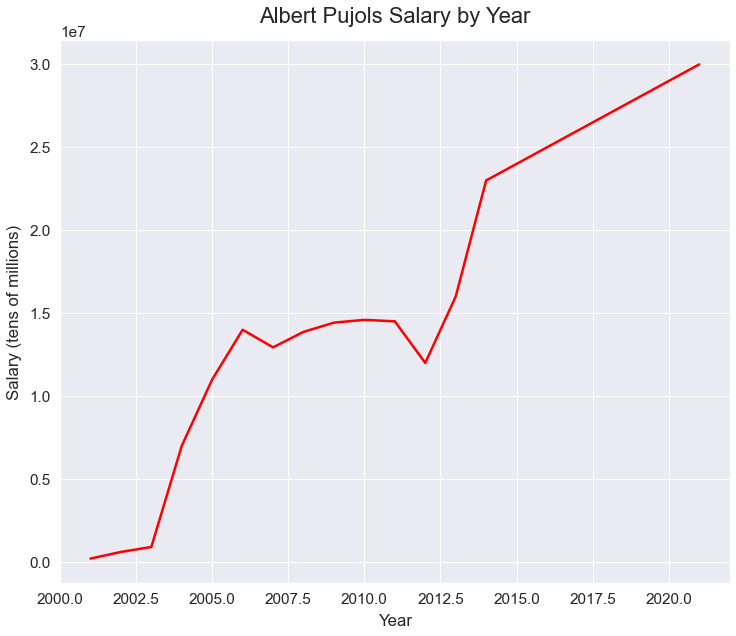

In [75]:
sns.set(font_scale=1.4)
AP_clean.set_index('Year')['Salary'].plot(figsize=(12,10), linewidth=2.5, color='red')
plt.xlabel('Year', labelpad=7)
plt.ylabel('Salary (tens of millions)', labelpad=7)
plt.title("Albert Pujols Salary by Year", y=1.02, fontsize=22);

,Year,Age,Tm,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Salary
0,2001,21,STL,161,676,590,112,194,47,4,...,0.610,1.013,157,360,21,9,1,7,6,200000
1,2002,22,STL,157,675,590,118,185,40,2,...,0.561,0.955,151,331,20,9,0,4,13,600000
2,2003,23,STL,157,685,591,137,212,51,1,...,0.667,1.106,187,394,13,10,0,5,12,900000
3,2004,24,STL,154,692,592,133,196,51,2,...,0.657,1.072,173,389,21,7,0,9,12,7000000
4,2005,25,STL,161,700,591,129,195,38,2,...,0.609,1.039,168,360,19,9,0,3,27,11000000
